In [1]:
import numpy as np
from sklearn import model_selection
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
import xlrd
import matplotlib.pyplot as plt
print(tf.__version__)

/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


1.4.1


In [2]:
# import data from xls file
excel = xlrd.open_workbook('GDP_BR_54_dnn_1996_2017.xls') #upload xls data
sheet_0 = excel.sheet_by_index(0) #index 0 = first sheet
all_data = [[]] #temporary file
for row_index in range(sheet_0.nrows): #read all rows
    row = []
    for col_index in range(sheet_0.ncols): #read all columns
        value = sheet_0.cell(rowx=row_index,colx=col_index).value
        row.append(value)
    all_data.append(row)

In [3]:
# convert to array
all_raw_data = []
for f0 in range(1,len(all_data)):
    raw_data = []
    for row in range(len(all_data[f0])):
        value = (all_data[f0])[row]
        raw_data.append(value)
    all_raw_data.append(raw_data)
dataset = np.array(all_raw_data)
print("Data shape: {}".format(dataset.shape))

Data shape: (264, 55)


In [4]:
#each run is a nowcast over all period
all_nowcasts = []

for run in range(0,20): #### WARNING: 40 hours running, if range(0,60) - MacBook 2,5GHz i5 8GB 1600MHz
    print(run)
    #recursive nowcasting one step (quarter) ahead, monthly data.
    nowcast_gdp = [] # save nowcasts from 2010Q1 to 2017Q4.

    for step in range(0,32): 
        print(step)
        #targets (GDP)
        y = dataset[:168+(step*3),0]
        #features
        x = dataset[:168+(step*3),25:dataset.shape[1]] #1
        # Split dataset into train(70%) / test(30%) 
        #seed=1
        x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3)#, random_state=seed)
        # Shuffle the training set
        order = np.argsort(np.random.random(y_train.shape))
        x_train = x_train[order]
        y_train = y_train[order]
    
        # Model
        def build_model():
            model = Sequential([
                keras.layers.Dense(150, kernel_regularizer=keras.regularizers.l1(0.001),
                               activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
                keras.layers.Dense(100, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
                keras.layers.Dense(50, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
                keras.layers.Dense(20, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
                keras.layers.Dense(1)
            ])
            optimizer = tf.train.ProximalAdagradOptimizer(0.001)
            model.compile(loss='mse',
                        optimizer=optimizer,
                        metrics=['mape'])
            return model
        model = build_model()
    
        # Train 
        print("Training...")
        class PrintDot(keras.callbacks.Callback):
            def on_epoch_end(self,epoch,logs):
                if epoch % 100 == 0: print('')
                print('.', end='')
        EPOCHS = 1000 #2500
        #Store training stats
        history = model.fit(x_train, y_train, epochs=EPOCHS,
                         validation_split=0.3, verbose=0,
                         callbacks=[PrintDot()])
    
        # Nowcast one step (quarter) ahead, monthly data
        x_nowcast = dataset[(167+(step*3)+1):(167+(step*3)+4),25:dataset.shape[1]] #1
        y_predictions = model.predict(x_nowcast).flatten()
        y_predicted = y_predictions.reshape(3,)#np.array(y).shape)
        nowcast_gdp.append(np.mean(y_predicted))
        
    all_nowcasts.append(nowcast_gdp)

0
0
Training...

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................

KeyboardInterrupt: 

In [11]:
#export nowcasts to csv file
a = np.asarray(all_nowcasts)
#np.savetxt("GDP_BR_54_nowcasts_2010_2017_oneStepAhead_keras.csv", a, delimiter=",")
np.savetxt("GDP_BR_30_nowcasts_2010_2017_oneStepAhead_keras.csv", a, delimiter=",")

In [5]:
nowcasts50array = np.array(all_nowcasts)

In [6]:
target = dataset[168:,0]

In [7]:
BR_GDP = []
for el in range(0,32):
    Q = target[el*3]
    BR_GDP.append(Q)
BR_GDP = np.array(BR_GDP)

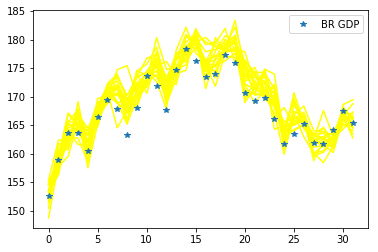

In [8]:
plt.close()
for f1 in range(0,len(nowcasts50array)):
    plt.plot(nowcasts50array[f1], '-', c='yellow') #nowcasts
plt.plot(BR_GDP, '*', label='BR GDP') #target
plt.legend()
plt.show()

In [9]:
plt.close()
plt.plot(BR_GDP, '*', label='BR GDP') #target
plt.legend()

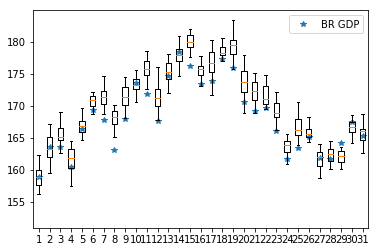

In [10]:
# PROBLEM: when insert nowcasts50array.T[0], GDP is shown with one lag.
plt.boxplot([#nowcasts50array.T[0], 
             nowcasts50array.T[1],
             nowcasts50array.T[2], 
             nowcasts50array.T[3],
             nowcasts50array.T[4], 
             nowcasts50array.T[5],
             nowcasts50array.T[6], 
             nowcasts50array.T[7],
             nowcasts50array.T[8], 
             nowcasts50array.T[9],
             nowcasts50array.T[10], 
             nowcasts50array.T[11],
             nowcasts50array.T[12], 
             nowcasts50array.T[13],
             nowcasts50array.T[14], 
             nowcasts50array.T[15],
             nowcasts50array.T[16], 
             nowcasts50array.T[17],
             nowcasts50array.T[18], 
             nowcasts50array.T[19],
             nowcasts50array.T[20], 
             nowcasts50array.T[21],
             nowcasts50array.T[22], 
             nowcasts50array.T[23],
             nowcasts50array.T[24], 
             nowcasts50array.T[25],
             nowcasts50array.T[26], 
             nowcasts50array.T[27],
             nowcasts50array.T[28], 
             nowcasts50array.T[29],
             nowcasts50array.T[30],
             nowcasts50array.T[31],],showfliers=False) #not showing outliers
plt.show()